## การตั้งค่าและการนำเข้าไลบรารี (Setup & Imports)

ขั้นตอนนี้เป็นการเตรียมความพร้อมก่อนเริ่มวิเคราะห์และสร้างโมเดล โดยการนำเข้าไลบรารีที่จำเป็นสำหรับการทำงานด้าน Data Analysis และ Machine Learning ใน Python เช่น:

- `pandas` และ `numpy`: สำหรับการจัดการข้อมูลในรูปแบบตาราง (DataFrame) และการคำนวณเชิงตัวเลข
- `matplotlib.pyplot`: สำหรับการสร้างกราฟเพื่อแสดงผลข้อมูล (Data Visualization)
- `sklearn`: ไลบรารีหลักสำหรับ Machine Learning มีโมดูลย่อยๆ เช่น:
    - `model_selection`: สำหรับแบ่งข้อมูลเป็นชุด Train และ Test
    - `preprocessing`: สำหรับเตรียมข้อมูล เช่น การทำ Scaling
    - `pipeline`: สำหรับสร้างขั้นตอนการทำงานของโมเดล
    - `linear_model` และ `ensemble`: สำหรับเรียกใช้โมเดล Logistic Regression และ RandomForestClassifier
    - `metrics`: สำหรับคำนวณและประเมินประสิทธิภาพของโมเดล เช่น accuracy, precision, recall, f1-score, ROC-AUC และ Confusion Matrix
- `IPython.display`: เพื่อให้การแสดงผล DataFrame ใน Colab ดูสวยงาม
- `%matplotlib inline`: เป็น Magic command ใน Colab เพื่อให้กราฟแสดงผลภายในโน้ตบุ๊กได้ทันที
- `RANDOM_STATE`: กำหนดค่า Seed สำหรับ Random Number เพื่อให้ผลลัพธ์จากการแบ่งข้อมูลและการเทรนโมเดลใกล้เคียงเดิมทุกครั้งที่รัน

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

from IPython.display import display  # แสดง DataFrame สวย ๆ ใน Colab

# ให้กราฟแสดงในโน้ตบุ๊ก
%matplotlib inline

# ตั้งค่า seed เพื่อให้ผลใกล้เคียงเดิมทุกครั้งที่รัน
RANDOM_STATE = 42



##  การโหลดข้อมูลและการปรับชื่อคอลัมน์ให้เป็นมาตรฐาน (Load Data & Standardize Column Names)

ขั้นตอนนี้จะทำการโหลดข้อมูลจากไฟล์ CSV เข้ามาใน DataFrame ของ Pandas และปรับปรุงชื่อคอลัมน์ให้เป็นมาตรฐาน เพื่อป้องกันปัญหาความไม่สอดคล้องกันของชื่อคอลัมน์ที่อาจเกิดจากการพิมพ์ผิด หรือใช้สัญลักษณ์ต่างกันเล็กน้อย

- **1) โหลดไฟล์ CSV:** ใช้ `pd.read_csv()` เพื่ออ่านข้อมูลจากไฟล์ที่ระบุ (`personality_dataset.csv`) เข้ามาเก็บในตัวแปร `df`
- **2) ทำชื่อคอลัมน์ให้เป็นมาตรฐาน:**
    - สร้างฟังก์ชัน `_norm(s)` เพื่อทำความสะอาดชื่อคอลัมน์ เช่น ลบช่องว่างหน้าหลัง, แปลงเป็นตัวพิมพ์เล็กทั้งหมด, และแทนที่ '-' หรือ '_' ด้วยช่องว่าง เพื่อให้ชื่อคอลัมน์มีความสอดคล้องกัน
    - กำหนด `expected` เป็น Dictionary ที่เก็บชื่อคอลัมน์ที่ต้องการ (Key) และรูปแบบชื่อคอลัมน์ที่อาจพบได้ (Value เป็น List ของ String)
    - สร้าง `colmap` เพื่อเก็บชื่อคอลัมน์เดิมและชื่อคอลัมน์ใหม่ที่ได้จากการ map ตาม `expected`
    - ใช้ `df.rename(columns=colmap)` เพื่อเปลี่ยนชื่อคอลัมน์ใน DataFrame ตามที่ map ไว้
- **3) แสดงภาพรวมข้อมูล:**
    - แสดงจำนวนแถวและคอลัมน์ของ DataFrame ที่โหลดมา (`df.shape`)
    - แสดงประเภทข้อมูลของแต่ละคอลัมน์ (`df.dtypes`) เพื่อตรวจสอบว่าข้อมูลถูกอ่านเข้ามาในรูปแบบที่ถูกต้องหรือไม่
    - แสดงจำนวนค่าว่าง (Missing Values) ในแต่ละคอลัมน์ (`df.isna().sum()`) เพื่อดูว่ามีข้อมูลส่วนไหนที่หายไปบ้าง
    - แสดงตัวอย่าง 5 แถวแรกของ DataFrame (`df.head()`) เพื่อให้เห็นหน้าตาของข้อมูล
    - ถ้ามีคอลัมน์ 'Personality' (ซึ่งเป็นคอลัมน์เป้าหมาย) จะแสดงการกระจายตัวของแต่ละคลาส (Extrovert/Introvert) (`df["Personality"].value_counts()`) เพื่อดูความสมดุลของข้อมูลเป้าหมาย

In [12]:
path = "personality_dataset.csv"
df = pd.read_csv(path)

def _norm(s: str) -> str:
    return s.strip().lower().replace("-", " ").replace("_", " ")

expected = {
    "Time_spent_Alone": ["time_spent_alone", "time spent alone"],
    "Stage_fear": ["stage_fear", "stage fear"],
    "Social_event_attendance": ["social_event_attendance", "social event attendance"],
    "Going_outside": ["going_outside", "going outside"],
    "Drained_after_socializing": ["drained_after_socializing", "drained after socializing"],
    "Friends_circle_size": ["friends_circle_size", "friends circle size"],
    "Post_frequency": ["post_frequency", "post frequency"],
    "Personality": ["personality", "target"]
}

colmap = {}
for col in df.columns:
    mapped = None
    for std_name, variants in expected.items():
        if _norm(col) in [_norm(v) for v in variants] or _norm(col) == _norm(std_name):
            mapped = std_name
            break
    colmap[col] = mapped if mapped else col

df = df.rename(columns=colmap)

print("Rows, Columns:", df.shape)
print("\nData Types:")
print(df.dtypes.astype(str))
print("\nMissing Values (count):")
print(df.isna().sum())

print("\nPreview (first 5 rows):")
display(df.head())

if "Personality" in df.columns:
    print("\nClass Distribution:")
    print(df["Personality"].value_counts(dropna=False))


Rows, Columns: (2900, 8)

Data Types:
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

Missing Values (count):
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Preview (first 5 rows):


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert



Class Distribution:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


##  การทำความสะอาดข้อมูลและการเข้ารหัส (Data Cleaning & Encoding)

ขั้นตอนนี้เป็นการจัดการข้อมูลให้พร้อมสำหรับการนำไปใช้สร้างโมเดล โดยเน้นที่การจัดการกับข้อมูลประเภทข้อความ, การแปลงค่าให้อยู่ในรูปแบบที่โมเดลเข้าใจ, และการจัดการกับค่าว่าง

- **สร้างสำเนา DataFrame:** สร้าง `df_clean = df.copy()` เพื่อป้องกันไม่ให้โค้ดส่วนนี้ไปแก้ไขข้อมูลใน `df` ต้นฉบับ
- **Trim ช่องว่างข้อความ:** ลบช่องว่างที่อาจอยู่หน้าหรือหลังข้อความในคอลัมน์ที่มีประเภทข้อมูลเป็น `object` เพื่อป้องกันการตีความผิดพลาดของข้อมูล
- **มาตรฐาน Yes/No:** สร้างฟังก์ชัน `bin_yes_no(x)` เพื่อแปลงคำตอบที่เป็น Yes/No ให้อยู่ในรูปแบบมาตรฐาน เช่น "Yes", "No" ไม่ว่าจะมาจากค่าเดิมแบบใด ("yes", "y", "1", "true", "no", "n", "0", "false") และนำไปใช้กับคอลัมน์ที่เกี่ยวข้อง เช่น 'Stage_fear', 'Drained_after_socializing'
- **มาตรฐาน Personality:** สร้างฟังก์ชัน `norm_target(x)` เพื่อแปลงค่าในคอลัมน์ 'Personality' ให้อยู่ในรูปแบบมาตรฐาน "Extrovert" หรือ "Introvert" ไม่ว่าจะมาจากค่าเดิมแบบใด (เช่น "extrovert", "introvert")
- **ระบุคอลัมน์ตัวเลข:** สร้าง List `num_cols` ที่มีชื่อคอลัมน์ที่เป็นตัวเลขตามที่ระบุไว้
- **แปลงเป็น numeric:** ใช้ `pd.to_numeric()` เพื่อแปลงข้อมูลในคอลัมน์ตัวเลขให้เป็นประเภทตัวเลขจริง ๆ หากแปลงไม่ได้ (เช่น มีตัวอักษรปนอยู่) จะให้ค่าเป็น `NaN` (Not a Number) เพื่อระบุว่าเป็นค่าที่ว่างหรือไม่ถูกต้อง
- **เติมค่าว่าง (Imputation):**
    - สำหรับคอลัมน์ตัวเลข: เติมค่าว่างด้วยค่ามัธยฐาน (Median) ของคอลัมน์นั้นๆ (`df_clean[c].median()`) เนื่องจาก Median มีความทนทานต่อค่าผิดปกติ (Outliers) มากกว่าค่าเฉลี่ย (Mean)
    - สำหรับคอลัมน์ประเภท Object: เติมค่าว่างด้วยค่าฐานนิยม (Mode) ของคอลัมน์นั้นๆ (`df_clean[c].mode(dropna=True).iloc[0]`) ซึ่งเป็นค่าที่พบบ่อยที่สุด
- **เข้ารหัส Yes/No เป็น 1/0:** สร้าง Dictionary `yn_map` {"Yes": 1, "No": 0} และใช้ `.map()` เพื่อแปลงค่าในคอลัมน์ 'Stage_fear' และ 'Drained_after_socializing' จาก "Yes"/"No" เป็น 1/0
- **เข้ารหัส Personality เป็น 1/0:** สร้าง Dictionary `tmap` {"Extrovert": 1, "Introvert": 0} และใช้ `.map()` เพื่อสร้างคอลัมน์ใหม่ 'Personality_num' ที่มีค่า 1 สำหรับ Extrovert และ 0 สำหรับ Introvert คอลัมน์นี้จะเป็นคอลัมน์เป้าหมายที่เราจะใช้เทรนโมเดล
- **แสดงผลหลังคลีน:** แสดงประเภทข้อมูล, จำนวนค่าว่าง, และตัวอย่างข้อมูล 10 แถวแรกหลังจากการทำความสะอาดและเข้ารหัส เพื่อตรวจสอบผลลัพธ์

In [13]:
df_clean = df.copy()

for c in df_clean.select_dtypes(include=["object"]).columns:
    df_clean[c] = df_clean[c].astype(str).str.strip()

def bin_yes_no(x):
    s = str(x).strip().lower()
    if s in ["yes", "y", "1", "true"]:
        return "Yes"
    if s in ["no", "n", "0", "false"]:
        return "No"
    return s.title()

for c in ["Stage_fear", "Drained_after_socializing"]:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].apply(bin_yes_no)

def norm_target(x):
    s = str(x).strip().lower()
    if s.startswith("extro"):
        return "Extrovert"
    if s.startswith("intro"):
        return "Introvert"
    return s.title()

if "Personality" in df_clean.columns:
    df_clean["Personality"] = df_clean["Personality"].apply(norm_target)

num_cols = [c for c in [
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency"
] if c in df_clean.columns]

# แปลงเป็น numeric (ถ้าไม่ได้ให้เป็น NaN)
for c in num_cols:
    df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

# เติมค่าว่าง numeric ด้วย median
for c in num_cols:
    med = df_clean[c].median()
    df_clean[c] = df_clean[c].fillna(med)

# เติมค่าว่าง object ด้วย mode
for c in df_clean.columns:
    if df_clean[c].dtype == "object":
        mode_val = df_clean[c].mode(dropna=True)
        if len(mode_val) > 0:
            df_clean[c] = df_clean[c].fillna(mode_val.iloc[0])

# เข้ารหัส Yes/No → 1/0
yn_map = {"Yes": 1, "No": 0}
for c in ["Stage_fear", "Drained_after_socializing"]:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].map(yn_map)

# เป้าหมาย: Extrovert→1, Introvert→0
tmap = {"Extrovert": 1, "Introvert": 0}
if "Personality" in df_clean.columns:
    df_clean["Personality_num"] = df_clean["Personality"].map(tmap)

print(" Cleaning done.")
print("\nData Types (after cleaning):")
print(df_clean.dtypes.astype(str))
print("\nMissing Values (after cleaning):")
print(df_clean.isna().sum())
print("\nPreview cleaned data (first 10 rows):")
display(df_clean.head(10))


 Cleaning done.

Data Types (after cleaning):
Time_spent_Alone             float64
Stage_fear                     int64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing      int64
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
Personality_num                int64
dtype: object

Missing Values (after cleaning):
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
Personality_num              0
dtype: int64

Preview cleaned data (first 10 rows):


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_num
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert,1
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert,0
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert,0
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert,1
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert,1
5,1.0,0,7.0,5.0,0,6.0,6.0,Extrovert,1
6,4.0,0,9.0,3.0,0,7.0,7.0,Extrovert,1
7,2.0,0,8.0,4.0,0,7.0,8.0,Extrovert,1
8,10.0,1,1.0,3.0,1,0.0,3.0,Introvert,0
9,0.0,0,8.0,6.0,0,13.0,8.0,Extrovert,1


## การวิเคราะห์ข้อมูลเบื้องต้น (EDA - Exploratory Data Analysis)

ขั้นตอนนี้เป็นการทำความเข้าใจลักษณะของข้อมูลผ่านการสรุปและสร้างภาพ เพื่อหา Insight ที่น่าสนใจก่อนนำไปสร้างโมเดล

- **3.1 สัดส่วนคลาส:**
    - คำนวณจำนวนข้อมูลในแต่ละคลาส (Extrovert/Introvert) ในคอลัมน์ 'Personality'
    - แสดงผลในรูปแบบข้อความ
    - สร้างกราฟ Bar Plot เพื่อแสดงสัดส่วนของแต่ละคลาสให้เห็นภาพได้ชัดเจน

- **3.2 ค่าเฉลี่ยฟีเจอร์หลักแยกตามบุคลิก:**
    - ถ้ามีทั้งคอลัมน์ 'Personality' และคอลัมน์ตัวเลข (`num_cols`) จะคำนวณค่าเฉลี่ยของแต่ละคอลัมน์ตัวเลข โดยแบ่งตามกลุ่มบุคลิก (Extrovert vs Introvert)
    - แสดงผลในรูปแบบตาราง DataFrame
    - สร้างกราฟ Bar Plot แยกสำหรับฟีเจอร์สำคัญ เช่น 'Social_event_attendance', 'Time_spent_Alone', 'Post_frequency' เพื่อเปรียบเทียบค่าเฉลี่ยระหว่าง Extrovert และ Introvert ว่าแตกต่างกันอย่างไรบ้าง โดยจัดให้อยู่ใน subplot เดียวกันเพื่อสะดวกในการเปรียบเทียบ

- **3.3 Histograms แบบปรับปรุง:**
    - สร้าง Histogram สำหรับแต่ละคอลัมน์ตัวเลข (`num_cols`) เพื่อดูการกระจายตัวของข้อมูลในแต่ละฟีเจอร์
    - จัดกราฟ Histogram ให้อยู่ในรูปแบบของ Subplots โดยมี 3 กราฟต่อแถว เพื่อให้ดูง่าย
    - ในแต่ละ Histogram จะมีการคำนวณและวาดเส้นแสดงค่า Mean (ค่าเฉลี่ย) และ Median (ค่ามัธยฐาน) เพื่อให้เห็นว่าการกระจายตัวของข้อมูลเป็นแบบสมมาตร (Mean ≈ Median) หรือเบ้ไปทางใดทางหนึ่ง

Class Distribution:
 Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


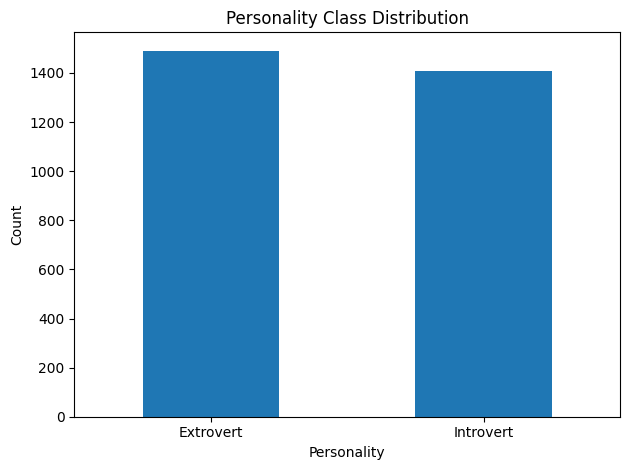

In [14]:
# สัดส่วนคลาส
if "Personality" in df_clean.columns:
    counts = df_clean["Personality"].value_counts()
    print("Class Distribution:\n", counts)
    plt.figure()
    counts.plot(kind="bar", rot=0)
    plt.title("Personality Class Distribution")
    plt.xlabel("Personality")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


Group Means by Personality:


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Personality,,,,,
Extrovert,2.12,5.98,4.60,9.10,5.59
Introvert,7.03,1.83,1.31,3.28,1.42


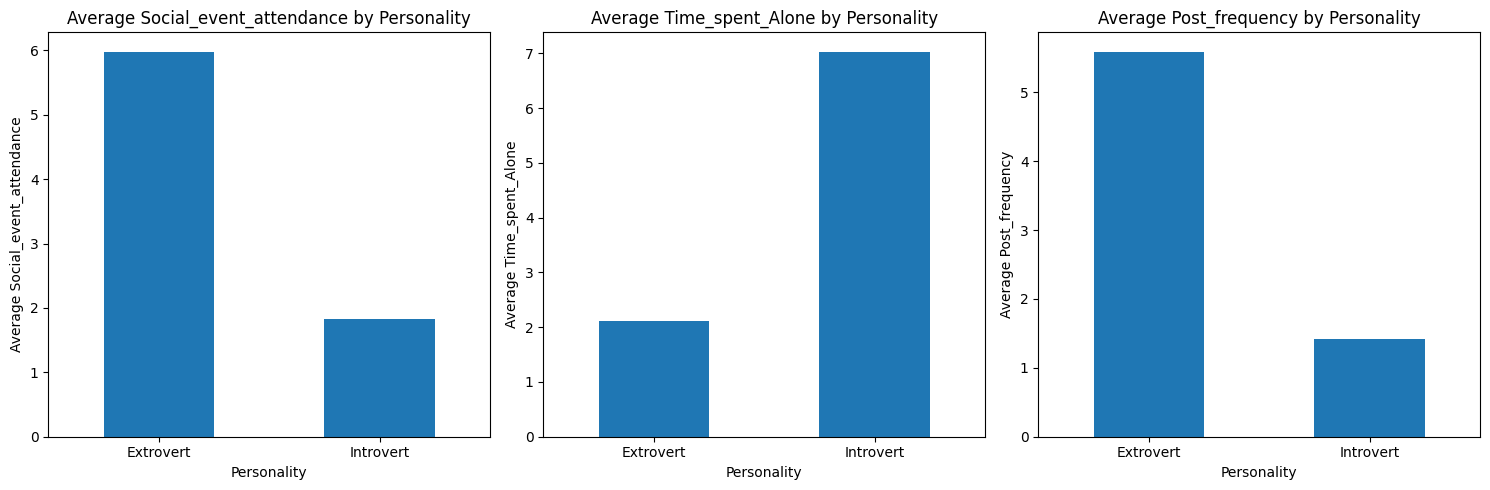

In [15]:
# ค่าเฉลี่ยฟีเจอร์หลักแยกตามบุคลิก
if "Personality" in df_clean.columns and len(num_cols) > 0:
    group_means = df_clean.groupby("Personality")[num_cols].mean().round(2)
    print("Group Means by Personality:")
    display(group_means)

    # กราฟเปรียบเทียบฟีเจอร์สำคัญ
    features_to_plot = [f for f in ["Social_event_attendance", "Time_spent_Alone", "Post_frequency"] if f in num_cols]
    if features_to_plot:
        fig, axes = plt.subplots(1, len(features_to_plot), figsize=(15, 5))
        if len(features_to_plot) == 1:
            axes = [axes]

        for i, feat in enumerate(features_to_plot):
            group_means[feat].plot(kind="bar", rot=0, ax=axes[i])
            axes[i].set_title(f"Average {feat} by Personality")
            axes[i].set_xlabel("Personality")
            axes[i].set_ylabel(f"Average {feat}")

        plt.tight_layout()
        plt.show()

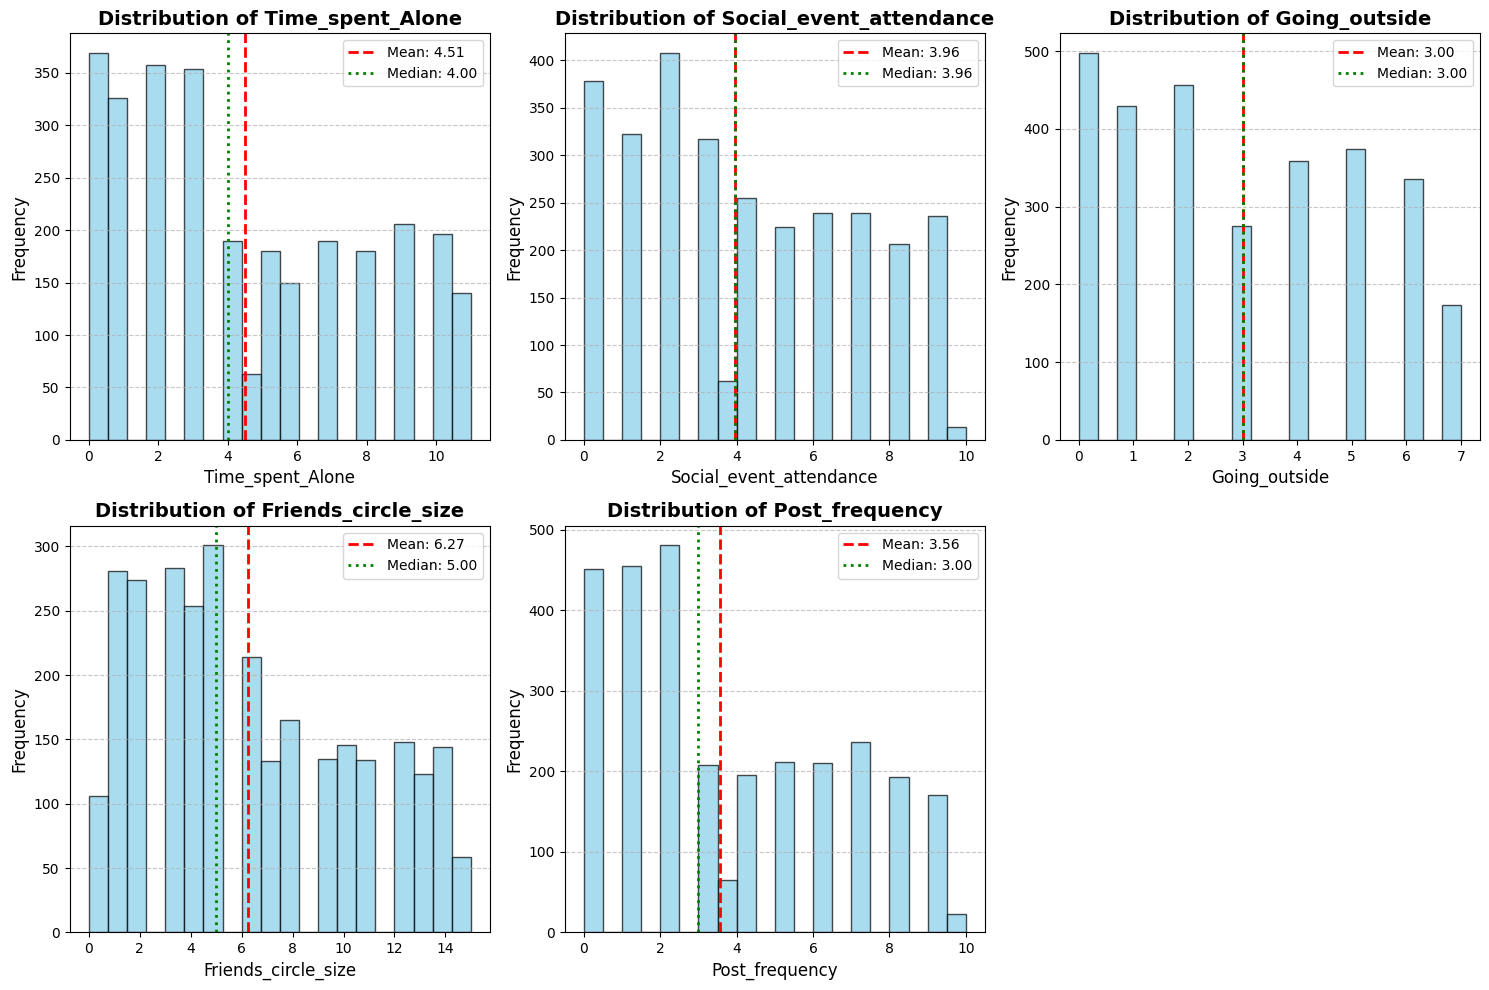

In [16]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, c in enumerate(num_cols):
    axes[i].hist(df_clean[c], bins=20, color="skyblue", edgecolor="black", alpha=0.7)

    # คำนวณค่า mean และ median
    mean_val = df_clean[c].mean()
    median_val = df_clean[c].median()

    # วาดเส้น mean (แดง) และ median (เขียว)
    axes[i].axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
    axes[i].axvline(median_val, color="green", linestyle=":", linewidth=2, label=f"Median: {median_val:.2f}")

    axes[i].set_title(f"Distribution of {c}", fontsize=14, weight="bold")
    axes[i].set_xlabel(c, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)
    axes[i].legend()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## การแบ่งข้อมูล, การสร้างและเทรนโมเดล, และการวัดประสิทธิภาพ (Train/Test Split & Modeling & Metrics)

ขั้นตอนนี้เป็นการเตรียมข้อมูลเพื่อสร้างโมเดล machine learning และฝึกสอนโมเดล จากนั้นจึงประเมินประสิทธิภาพของโมเดลที่สร้างขึ้น

- **เลือกฟีเจอร์ (X) และเป้าหมาย (y):**
    - กำหนด `feature_cols` เป็น List ของชื่อคอลัมน์ที่เราจะใช้เป็น Input (ตัวแปรอิสระ) ในโมเดล โดยรวมคอลัมน์ตัวเลขและคอลัมน์ Yes/No ที่แปลงเป็น 1/0 แล้ว
    - กำหนด `X` คือข้อมูลฟีเจอร์ (ค่าจากคอลัมน์ใน `feature_cols`) และ `y` คือข้อมูลเป้าหมาย (ค่าจากคอลัมน์ 'Personality_num' ที่แปลง Extrovert=1, Introvert=0 แล้ว)
- **แบ่งข้อมูล Train/Test:** ใช้ `train_test_split()` เพื่อแบ่งข้อมูล `X` และ `y` ออกเป็น 2 ชุด คือ ชุดสำหรับฝึกสอนโมเดล (Train) และ ชุดสำหรับทดสอบโมเดล (Test) โดยแบ่งในอัตรา 80:20 (`test_size=0.2`) และใช้ `stratify=y` เพื่อให้สัดส่วนของคลาสเป้าหมายในชุด Train และ Test ใกล้เคียงกัน ป้องกันปัญหาคลาสไม่สมดุล
- **สร้างโมเดล:**
    - **Logistic Regression:** สร้าง `Pipeline` ที่มี 2 ขั้นตอน คือ การทำ Standard Scaling (ปรับค่าฟีเจอร์ให้อยู่ใน Scale เดียวกัน) และ Logistic Regression (โมเดลสำหรับการจำแนกประเภท)
    - **Random Forest:** สร้างโมเดล RandomForestClassifier ซึ่งเป็นโมเดลแบบ Ensemble (ใช้ต้นไม้ตัดสินใจหลายๆ ต้นร่วมกัน)
- **เทรนโมเดล:** ใช้ `.fit()` เพื่อฝึกสอนโมเดลทั้งสองด้วยข้อมูลชุด Train (`X_train`, `y_train`)
- **พยากรณ์:** ใช้ `.predict()` เพื่อให้โมเดลทำนายคลาสเป้าหมายบนข้อมูลชุด Test (`X_test`) และใช้ `.predict_proba()` เพื่อให้โมเดลทำนายความน่าจะเป็นของแต่ละคลาส ซึ่งจำเป็นสำหรับการคำนวณค่า ROC-AUC
- **คำนวณเมตริก:** สร้างฟังก์ชัน `metrics_pack()` เพื่อคำนวณเมตริกการประเมินผลที่สำคัญ เช่น Accuracy, Precision, Recall, F1-Score, และ ROC-AUC และนำไปใช้กับผลการทำนายของทั้งสองโมเดล
- **แสดงผลเมตริก:** สร้าง DataFrame `metrics_df` เพื่อแสดงค่าเมตริกของทั้งสองโมเดลในรูปแบบตาราง ทำให้เปรียบเทียบประสิทธิภาพได้ง่าย
- **เลือกโมเดลที่ดีที่สุด:** เปรียบเทียบค่า F1-Score ของทั้งสองโมเดล และระบุชื่อโมเดลที่มีค่า F1-Score สูงกว่าว่าเป็น "Best model"

In [17]:
# เลือกฟีเจอร์ (numeric + binary ที่ encode แล้ว)
feature_cols = []
feature_cols += num_cols
for c in ["Stage_fear", "Drained_after_socializing", "Friends_circle_size"]:
    if c in df_clean.columns and c not in feature_cols:
        feature_cols.append(c)

# กัน target ไม่ให้ซ้ำซ้อน
feature_cols = [c for c in feature_cols if c not in ["Personality", "Personality_num"]]

# ลบแถวที่ target เป็น NaN (เผื่อไว้)
model_df = df_clean.dropna(subset=["Personality_num"]).copy()

X = model_df[feature_cols].values
y = model_df["Personality_num"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# สร้างโมเดล
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])
rf_clf = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE)

# เทรน
logreg_pipe.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# พยากรณ์
y_pred_lr = logreg_pipe.predict(X_test)
y_proba_lr = logreg_pipe.predict_proba(X_test)[:, 1]

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# ฟังก์ชันคำนวณเมตริกสำคัญ
def metrics_pack(y_true, y_pred, y_proba):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba)
    }

m_lr = metrics_pack(y_test, y_pred_lr, y_proba_lr)
m_rf = metrics_pack(y_test, y_pred_rf, y_proba_rf)

metrics_df = pd.DataFrame([m_lr, m_rf], index=["LogisticRegression", "RandomForest"]).round(4)

print("=== Model Metrics (Test Set) ===")
display(metrics_df)

# เลือกโมเดลที่ดีที่สุดด้วย F1
best_model_name = "RandomForest" if m_rf["f1"] >= m_lr["f1"] else "LogisticRegression"
print("\nBest model by F1:", best_model_name)


=== Model Metrics (Test Set) ===


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.9121,0.9158,0.9128,0.9143,0.9216
RandomForest,0.9103,0.9184,0.9060,0.9122,0.9497



Best model by F1: LogisticRegression


## การวิเคราะห์ข้อผิดพลาด (Error Analysis)

ขั้นตอนนี้เน้นการทำความเข้าใจว่าโมเดลทำนายผิดพลาดอย่างไรบ้าง โดยดูจาก Confusion Matrix และ Classification Report

- **เลือกผลการทำนายของโมเดลที่ดีที่สุด:** ใช้ผลการทำนาย (`y_pred`) ของโมเดลที่ถูกเลือกในขั้นตอนก่อนหน้า
- **สร้าง Confusion Matrix:** ใช้ `confusion_matrix()` เพื่อสร้างตาราง Confusion Matrix ซึ่งแสดงจำนวน True Positives (TP), True Negatives (TN), False Positives (FP), และ False Negatives (FN) บนข้อมูลชุด Test
    - TP: ทำนาย Extrovert ถูก เมื่อความเป็นจริงคือ Extrovert
    - TN: ทำนาย Introvert ถูก เมื่อความเป็นจริงคือ Introvert
    - FP: ทำนาย Extrovert ผิด เมื่อความเป็นจริงคือ Introvert (Type I Error)
    - FN: ทำนาย Introvert ผิด เมื่อความเป็นจริงคือ Extrovert (Type II Error)
- **แสดง Confusion Matrix ด้วยกราฟ:** สร้างกราฟเพื่อแสดง Confusion Matrix โดยมีตัวเลขจำนวน TP, TN, FP, FN แสดงอยู่ในช่องต่างๆ ของกราฟ ทำให้เห็นภาพรวมการทำนายถูก/ผิดได้ชัดเจน
- **แสดง Classification Report:** ใช้ `classification_report()` เพื่อแสดงรายงานที่รวมค่า Precision, Recall, F1-Score และ Support (จำนวนข้อมูลจริง) ของแต่ละคลาส (Introvert และ Extrovert) รวมถึงค่าเฉลี่ยโดยรวม (accuracy, macro avg, weighted avg) ซึ่งเป็นรายงานที่สรุปผลการประเมินโมเดลได้ครอบคลุม

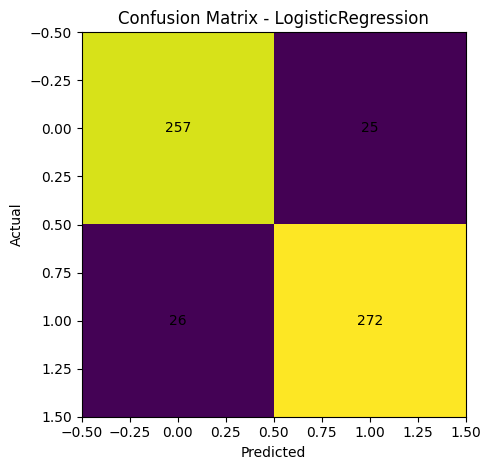


Classification Report (best model):
              precision    recall  f1-score   support

Introvert(0)       0.91      0.91      0.91       282
Extrovert(1)       0.92      0.91      0.91       298

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



In [18]:
y_pred_best = y_pred_rf if best_model_name == "RandomForest" else y_pred_lr
cm = confusion_matrix(y_test, y_pred_best)

plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, int(val), ha='center', va='center')

plt.tight_layout()
plt.show()

print("\nClassification Report (best model):")
print(classification_report(y_test, y_pred_best, target_names=["Introvert(0)", "Extrovert(1)"]))


## การอธิบายผลลัพธ์ (Explainability - What drives the prediction?)

ขั้นตอนนี้เป็นการพยายามอธิบายว่าฟีเจอร์ (ตัวแปรอิสระ) ใดบ้างที่มีความสำคัญต่อการทำนายบุคลิกภาพของโมเดล เพื่อให้เราเข้าใจว่าโมเดลใช้ปัจจัยอะไรในการตัดสินใจ

- **ตรวจสอบโมเดลที่ชนะ:** ดูว่าโมเดลที่ดีที่สุดคือ Logistic Regression หรือ Random Forest
- **คำนวณ Feature Importance:**
    - **ถ้าเป็น Random Forest:** ใช้ `.feature_importances_` ซึ่งเป็นคุณสมบัติของโมเดล Random Forest ที่บอกว่าแต่ละฟีเจอร์มีส่วนสำคัญต่อการตัดสินใจของโมเดลมากน้อยแค่ไหน (ยิ่งค่าสูง ยิ่งสำคัญมาก)
    - **ถ้าเป็น Logistic Regression:** ใช้ค่าสัมประสิทธิ์ (coefficients) ของแต่ละฟีเจอร์จากโมเดล `.coef_` ค่าสัมประสิทธิ์ที่ห่างจาก 0 มาก (ทั้งค่าบวกและลบ) แสดงว่าฟีเจอร์นั้นมีผลต่อการทำนายมาก จึงใช้ค่าสัมบูรณ์ (`np.abs()`) เพื่อดูขนาดความสำคัญ
- **จัดเรียงลำดับความสำคัญ:** เรียงลำดับฟีเจอร์ตามค่า Feature Importance หรือ Absolute Coefficients จากน้อยไปมาก
- **แสดงผลด้วยกราฟ:** สร้างกราฟ Bar Plot แนวนอน เพื่อแสดงค่าความสำคัญของแต่ละฟีเจอร์ในรูปแบบที่เรียงลำดับแล้ว ทำให้เห็นฟีเจอร์ที่สำคัญที่สุดได้อย่างชัดเจน
- **แสดงรายชื่อฟีเจอร์ที่สำคัญ:** พิมพ์รายชื่อฟีเจอร์และค่าความสำคัญ เรียงจากมากไปน้อย เพื่อสรุปผล

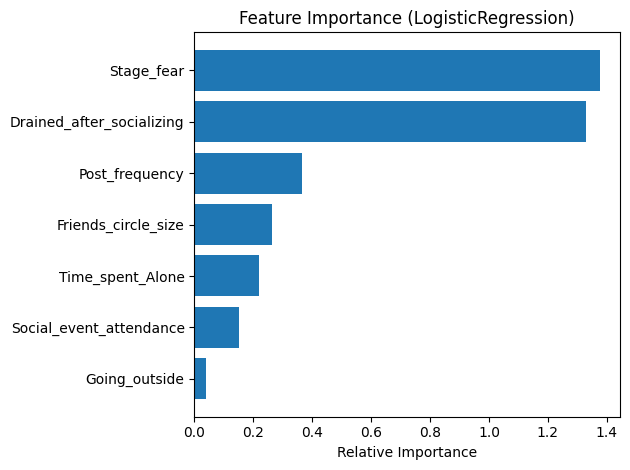


Top Features (descending):
- Stage_fear: 1.3759
- Drained_after_socializing: 1.3280
- Post_frequency: 0.3651
- Friends_circle_size: 0.2643
- Time_spent_Alone: 0.2202
- Social_event_attendance: 0.1514
- Going_outside: 0.0412


In [19]:
# - ถ้า RF ชนะ: ใช้ feature_importances_
# - ถ้า LR ชนะ: ใช้ absolute value ของ coefficients

if best_model_name == "RandomForest":
    importances = rf_clf.feature_importances_
    names = feature_cols
else:
    lr = logreg_pipe.named_steps["clf"]
    coefs = lr.coef_.reshape(-1)
    importances = np.abs(coefs)
    names = feature_cols

order = np.argsort(importances)

plt.figure()
plt.barh(range(len(order)), importances[order])
plt.yticks(range(len(order)), [names[i] for i in order])
plt.title(f"Feature Importance ({best_model_name})")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

print("\nTop Features (descending):")
for i in order[::-1]:
    print(f"- {names[i]}: {importances[i]:.4f}")


## การส่งออกและการแสดงรายงานสรุป (Export & Show a Short Text Report)

ขั้นตอนนี้เป็นการรวบรวมข้อมูลสำคัญจากผลลัพธ์ที่ได้ในขั้นตอนก่อนหน้า มาสรุปเป็นรายงานแบบข้อความ ทั้งแสดงผลบนหน้าจอและบันทึกเป็นไฟล์

- **สร้างรายการข้อความสำหรับรายงาน:** เตรียม List เปล่า `report_lines` เพื่อเก็บแต่ละบรรทัดของรายงาน
- **เพิ่มหัวข้อและข้อมูลพื้นฐาน:** ใส่หัวข้อรายงาน, ขนาดข้อมูล (จำนวนแถวและคอลัมน์), และสัดส่วนการกระจายตัวของคลาสเป้าหมาย (จาก STEP 3.1)
- **เพิ่มผลการประเมินโมเดล:** ดึงค่าเมตริก (Accuracy, Precision, Recall, F1, ROC-AUC) ของทั้ง Logistic Regression และ Random Forest (จาก STEP 4) มาแสดงในรายงาน
- **ระบุโมเดลที่ดีที่สุด:** แสดงชื่อโมเดลที่ถูกเลือกใน STEP 4
- **เพิ่มรายชื่อฟีเจอร์ที่สำคัญ:** นำรายชื่อฟีเจอร์ที่สำคัญที่สุด (จาก STEP 6) มาแสดงในรายงาน พร้อมค่าความสำคัญ
- **แสดงบนหน้าจอ:** พิมพ์ข้อความทั้งหมดใน `report_lines` ออกทางหน้าจอ
- **บันทึกเป็นไฟล์:** เปิดไฟล์ชื่อ 'short_report.txt' ในโหมดเขียน ('w') โดยกำหนด Encoding เป็น utf-8 เพื่อรองรับภาษาไทย (หากมี) และเขียนข้อความทั้งหมดใน `report_lines` ลงในไฟล์
- **แจ้งเตือนการบันทึก:** พิมพ์ข้อความ "Saved: short_report.txt" เพื่อยืนยันว่าไฟล์ถูกสร้างและบันทึกเรียบร้อยแล้ว

In [20]:
report_lines = []
report_lines.append("Personality Classification Project - Short Report")
report_lines.append("------------------------------------------------")
report_lines.append(f"Shape: {df_clean.shape}")

if "Personality" in df_clean.columns:
    counts = df_clean["Personality"].value_counts().to_dict()
    report_lines.append(f"Class Distribution: {counts}")

report_lines.append("")
report_lines.append("Model Performance (Test Set):")
report_lines.append(f"- Logistic Regression: Acc={m_lr['accuracy']:.3f}, Prec={m_lr['precision']:.3f}, "
                    f"Rec={m_lr['recall']:.3f}, F1={m_lr['f1']:.3f}, ROC-AUC={m_lr['roc_auc']:.3f}")
report_lines.append(f"- Random Forest:      Acc={m_rf['accuracy']:.3f}, Prec={m_rf['precision']:.3f}, "
                    f"Rec={m_rf['recall']:.3f}, F1={m_rf['f1']:.3f}, ROC-AUC={m_rf['roc_auc']:.3f}")

report_lines.append("")
report_lines.append(f"Best Model: {best_model_name}")
report_lines.append("Top Features (descending):")
for i in order[::-1]:
    report_lines.append(f"- {names[i]}: {importances[i]:.4f}")

print("\n".join(report_lines))

with open("short_report.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(report_lines))

print("Saved: short_report.txt")


Personality Classification Project - Short Report
------------------------------------------------
Shape: (2900, 9)
Class Distribution: {'Extrovert': 1491, 'Introvert': 1409}

Model Performance (Test Set):
- Logistic Regression: Acc=0.912, Prec=0.916, Rec=0.913, F1=0.914, ROC-AUC=0.922
- Random Forest:      Acc=0.910, Prec=0.918, Rec=0.906, F1=0.912, ROC-AUC=0.950

Best Model: LogisticRegression
Top Features (descending):
- Stage_fear: 1.3759
- Drained_after_socializing: 1.3280
- Post_frequency: 0.3651
- Friends_circle_size: 0.2643
- Time_spent_Alone: 0.2202
- Social_event_attendance: 0.1514
- Going_outside: 0.0412
Saved: short_report.txt
